In [1]:
### librairies necessaires, chercher la documentation au besoin
import netCDF4 as net
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta



## Defining the variables and geo-parameters

In [3]:
#default values for QUEBEC : change depending on use case
## relative grid index, which translates to the right coordinates
r_min_lat =120
r_max_lat =180
r_min_lon =200
r_max_lon =260
target_data = [r_min_lat, r_max_lat, 
               r_min_lon, r_max_lon]


## the map uses a different coordinate system : this one is alse 
### calibrated to center on Quebec
map_lat_min= 37
map_lat_max = 65
map_lon_min = -85
map_lon_max = -50
target_map = [map_lat_min, map_lat_max, 
              map_lon_min, map_lon_max]





In [7]:
## the path that I am going to use
path = "/Users/billxue/tmax.eval.ERA-Int.CRCM5-OUR.day.NAM-22.raw.nc"

In [10]:
dataset = net.Dataset(path)
time = dataset["time"][:]
data = dataset["tmax"]
lat_g = np.ma.getdata(dataset["lat"][:])
lon_g = np.ma.getdata(dataset["lon"][:])
unit = dataset["time"].units
coor_grid_lat = lat_g[target_data[0]:target_data[1], 
                    target_data[2] : target_data[3]]
coor_grid_lon = lon_g[target_data[0]:target_data[1], 
                    target_data[2] : target_data[3]]

In [17]:
ex_1 = t1 = data[0,target_data[0]:target_data[1], target_data[2] : target_data[3]]

## Mapping and grid mapping

Mapping is an important part of handling netcfd files. You have many options to customize the map to your liking with the mapper, and map_grid function. Try out the features to adapt it to your liking. Obviously, there are limits to these functions, and for more complex adaptations you will need to rewrite them

In [19]:
def mapper(data, title_name, fig_size = (20,6), 
           label = "",coor_grid_lon = coor_grid_lon,
           coor_grid_lat = coor_grid_lat, 
           target_data = target_data,
           target_map = target_map, path = "./", 
           int_lat = 5, int_lon = 10, save = True):
    
    plt.figure(figsize=fig_size)
    parallels = np.arange(target_map[0],target_map[1],int_lat)
    meridians = np.arange(target_map[2],target_map[3],int_lon)

    map = Basemap(projection='merc',
                  llcrnrlon=target_map[2],
                  llcrnrlat=target_map[0],
                  urcrnrlon=target_map[3],
                  urcrnrlat=target_map[1],
                  resolution='i')

    x,y = map(coor_grid_lon ,coor_grid_lat)

    assoc = map.contourf(x,y,data)
    cb = map.colorbar(assoc, "right", size = "5%", pad = "2%")
    cb.set_label(label)
    plt.title(title_name)

    map.drawcoastlines()
    map.drawstates()
    map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    map.drawmeridians(meridians,labels=[0,1,0,0],fontsize=10)

    if save:
        plt.savefig(f"{path}{'_'.join(title_name.split(' '))}.png")
    plt.show()

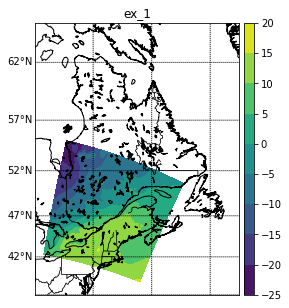

In [22]:
mapper(ex_1, "ex_1", fig_size = (10,5))

Making single maps is interesting, but we can take it to another level of automation by making map grids, or plots with subplots. 
The map_grid function allows you to do this with a lot of flexibility for the data of your liking. The data that you input should be coherent with the grid_shape argument, or greater (the function will just do the necessary iterations)

In [40]:
def map_grid(data, grid_shape,title_name, label = "",
             coor_grid_lon = coor_grid_lon,
             coor_grid_lat = coor_grid_lat, 
             target_data = target_data,
             target_map = target_map, path = "./", 
             int_lat = 5, int_lon = 10, save = True):
    
    parallels = np.arange(target_map[0],target_map[1],int_lat)
    meridians = np.arange(target_map[2],target_map[3],int_lon)

    fig, axes = plt.subplots(nrows=grid_shape[0], ncols=grid_shape[1], squeeze=False,figsize=(20,10))
    ## well this thing is utterly frustrating
    i = 0
    for ax in axes.flat:
        map = Basemap(projection='merc',llcrnrlon=target_map[2],llcrnrlat=target_map[0],urcrnrlon=target_map[3],urcrnrlat=target_map[1],resolution='i', ax = ax)
        x,y = map(coor_grid_lon ,coor_grid_lat)


        assoc = map.contourf(x,y,data[i,:,:])

        cb = map.colorbar(assoc, "right", size = "5%", pad = "2%")
        map.drawcoastlines()
        map.drawstates()
        map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        map.drawmeridians(meridians,labels=[0,1,0,0],fontsize=10)
        i+= 1

    if save:
        plt.savefig(f"{path}{'_'.join(title_name.split(' '))}.png")
    plt.show()

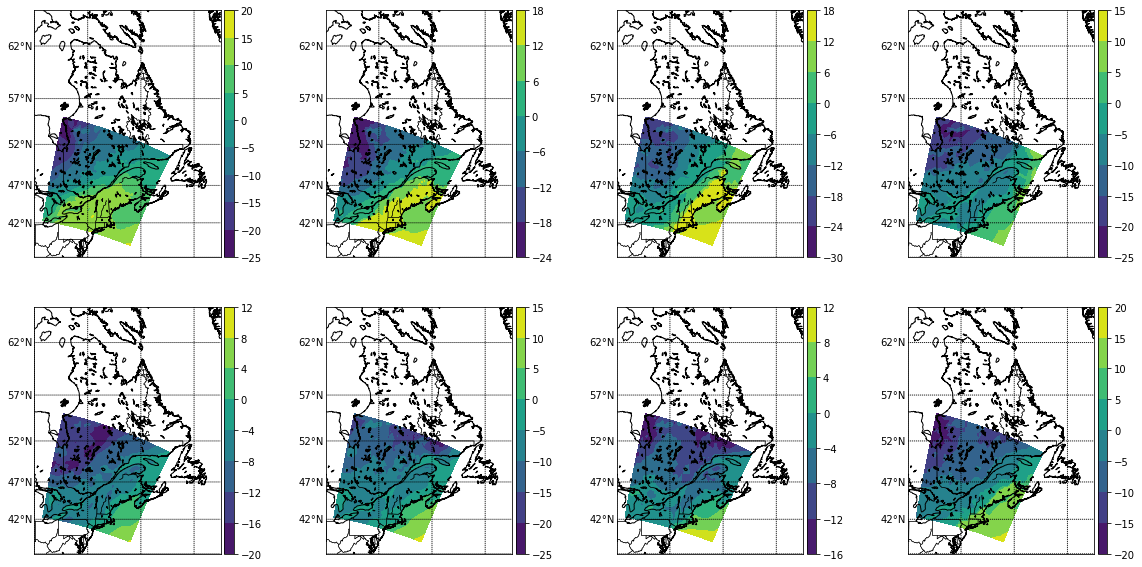

In [42]:
range_1 = data[:10, target_data[0]:target_data[1],target_data[2]:target_data[3]]
map_grid(range_1, (2,4),"data_winter_raw")

as with the mapper function, you can customize each minigraph to your own liking

## Analysis

The season analysis function was created with flexibility in mind. It returns, by means only of the input data, a coherent NP array with the processed data, with the total years and days so that you may subsequently choose how to transform the resulting data

In [47]:
winter_data = season_analysis(1, mode = "data")

0 1980-03-21 12:00:00 -----> 1980-06-21 12:00:00
1 1981-03-21 12:00:00 -----> 1981-06-21 12:00:00
2 1982-03-21 12:00:00 -----> 1982-06-21 12:00:00
3 1983-03-21 12:00:00 -----> 1983-06-21 12:00:00
4 1984-03-21 12:00:00 -----> 1984-06-21 12:00:00
5 1985-03-21 12:00:00 -----> 1985-06-21 12:00:00
6 1986-03-21 12:00:00 -----> 1986-06-21 12:00:00
7 1987-03-21 12:00:00 -----> 1987-06-21 12:00:00
8 1988-03-21 12:00:00 -----> 1988-06-21 12:00:00
9 1989-03-21 12:00:00 -----> 1989-06-21 12:00:00
10 1990-03-21 12:00:00 -----> 1990-06-21 12:00:00
11 1991-03-21 12:00:00 -----> 1991-06-21 12:00:00
12 1992-03-21 12:00:00 -----> 1992-06-21 12:00:00
13 1993-03-21 12:00:00 -----> 1993-06-21 12:00:00
14 1994-03-21 12:00:00 -----> 1994-06-21 12:00:00
15 1995-03-21 12:00:00 -----> 1995-06-21 12:00:00
16 1996-03-21 12:00:00 -----> 1996-06-21 12:00:00
17 1997-03-21 12:00:00 -----> 1997-06-21 12:00:00
18 1998-03-21 12:00:00 -----> 1998-06-21 12:00:00
19 1999-03-21 12:00:00 -----> 1999-06-21 12:00:00
20 2000-03

In [46]:
winter_data[0].shape

(3069, 60, 60)

### Example of a custom operation

Your custom operation should keep the same overall form and input to work with the season analysis function properly

In [32]:
def operation2(dates, data_coor, dataset):
    
    ## do not change this 
    start = dates[0]
    end = dates[1]
    data_final = dataset[start:end, data_coor[0]:data_coor[1], data_coor[2]:data_coor[3]]
    
    ## change this
    return np.min(data_final, axis = 0).reshape(1,60,60)

In [34]:
winter_data_min = season_analysis(0, options = operation2)

0 1979-12-21 12:00:00 -----> 1980-03-21 12:00:00
1 1980-12-21 12:00:00 -----> 1981-03-21 12:00:00
2 1981-12-21 12:00:00 -----> 1982-03-21 12:00:00
3 1982-12-21 12:00:00 -----> 1983-03-21 12:00:00
4 1983-12-21 12:00:00 -----> 1984-03-21 12:00:00
5 1984-12-21 12:00:00 -----> 1985-03-21 12:00:00
6 1985-12-21 12:00:00 -----> 1986-03-21 12:00:00
7 1986-12-21 12:00:00 -----> 1987-03-21 12:00:00
8 1987-12-21 12:00:00 -----> 1988-03-21 12:00:00
9 1988-12-21 12:00:00 -----> 1989-03-21 12:00:00
10 1989-12-21 12:00:00 -----> 1990-03-21 12:00:00
11 1990-12-21 12:00:00 -----> 1991-03-21 12:00:00
12 1991-12-21 12:00:00 -----> 1992-03-21 12:00:00
13 1992-12-21 12:00:00 -----> 1993-03-21 12:00:00
14 1993-12-21 12:00:00 -----> 1994-03-21 12:00:00
15 1994-12-21 12:00:00 -----> 1995-03-21 12:00:00
16 1995-12-21 12:00:00 -----> 1996-03-21 12:00:00
17 1996-12-21 12:00:00 -----> 1997-03-21 12:00:00
18 1997-12-21 12:00:00 -----> 1998-03-21 12:00:00
19 1998-12-21 12:00:00 -----> 1999-03-21 12:00:00
20 1999-12

In [37]:
winter_data_min[0].shape

(34, 60, 60)

This is coherent with what we want. Howerver,if we want the total average for example, we simply can:

In [39]:
winter_data_min_average = np.average(winter_data_min[0], axis = 0)
winter_data_min_average.shape

(60, 60)

the process is flexible

### Basic data analysis

In [43]:
def basic_stats(data, time = time, data_coor = target_data):
    time_index = time_index - 0.5
    
    data = data[int(time_index[0]): int(time_index[-1]), 
                   data_coor[0]:data_coor[1], 
                   data_coor[2]:data_coor[3]]
    
    basic_data = {"max": np.amax(data), 
                  "min": np.amin(data),
                  "q1":np.percentile(data, 25) , 
                  "q2" : np.percentile(data, 50),
                  "q3": np.percentile(data, 75), 
                  "average": np.average(data)}
    
    return basic_data